# Nama      : Brian Mohamad Safiudin
# NIM       : 2141720133
# Kelas     : TI - 3F

---
# **Praktikum 1 - Pertemuan 9**
---
Pada pratikum ini, Anda diminta untuk melakukan klasifikasi bunga iris dengan menggunakan model Perceptron. Anda dapat menggunakan dataset iris pada praktikum sebelumnya.
Untuk nembah pemahaman Anda terkait dengan model Perceptron, pada pratkikum ini Anda akan membuat model Perceptron tanpa menggunakan library.

---
# **Langkah 1 - Import Library**
---

In [ ]:
# Import library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

---
# **Langkah 2 - Load Data dan Visualisasi**
---

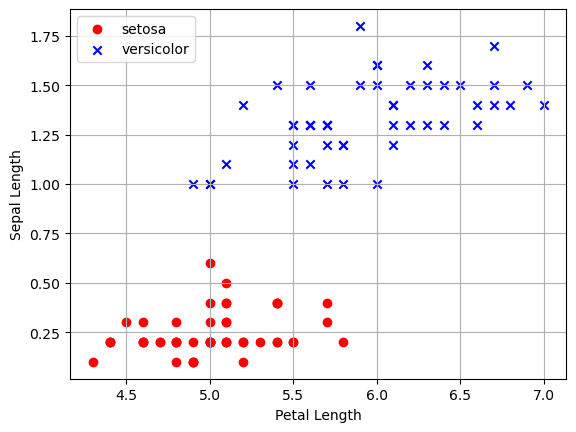

In [ ]:
# Baca dataset
df = pd.read_csv('iris.csv', header=None)

# Filter data untuk 'Iris-setosa' dan 'Iris-versicolor'
setosa = df[df[4] == 'Iris-setosa']
versicolor = df[df[4] == 'Iris-versicolor']
virginica = df[df[4] == 'Iris-virginica']

a, b = 0, 3

# Scatter plot untuk 'Iris-setosa' (merah)
plt.scatter(setosa[a], setosa[b], color='red', marker='o', label='setosa')

# Scatter plot untuk 'Iris-versicolor' (biru)
plt.scatter(versicolor[a], versicolor[b], color='blue', marker='x', label='versicolor')

plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.legend(loc='upper left')
plt.grid()
plt.show()

---
# **Langkah 3 - Membuat Kelas Perceptron**
---

In [ ]:
# Kelas perceptron
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[0] += update
                self.w_[1:] += update * xi
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

---
# **Langkah 4 - Pilih Data dan Encoding Label**
---

In [ ]:
# pilih data dan encoding label
y = df.iloc[0:100, 4].values # pilih 100 data awal
y = np.where(y == 'Iris-setosa', -1, 1) # ganti coding label
X = df.iloc[0:100, [0, 3]].values # slice data latih

---
# **Langkah 5 - Fitting Model**
---

In [ ]:
# Inisialisasi dan fitting model perceptron
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

---
# **Langkah 6 - Visualisasi Nilai Error Per Epoch**
---

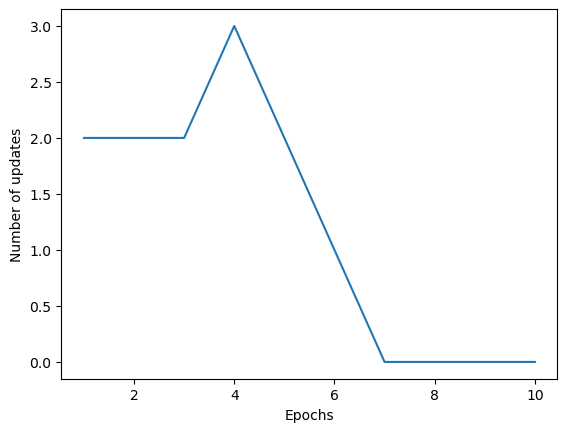

In [ ]:
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_)
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

---
# **Langkah 7 - Visualiasasi Decision Boundary**
---

C:\Users\user\AppData\Local\Temp\ipykernel_12836\2106051980.py:28: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)


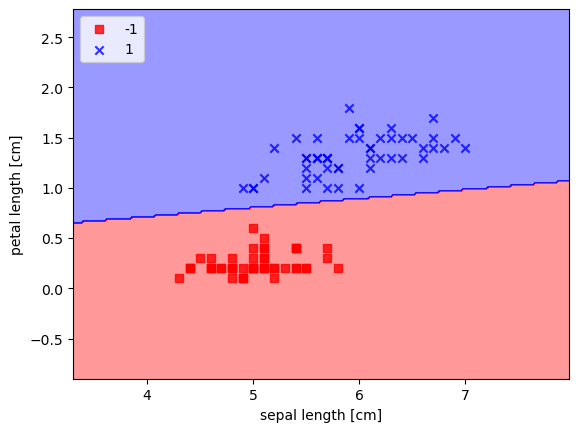

In [ ]:
# visualisasi decision boundary
# buat fungsi untuk plot decision region

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('r', 'b', 'g', 'k', 'grey')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision regions by creating a pair of grid arrays xx1 and xx2 via meshgrid function in Numpy
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    # use predict method to predict the class labels z of the grid points
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    # draw the contour using matplotlib
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for i, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)

plot_decision_regions(X, y, ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

---
# **Praktikum 2 - Pertemuan 9**
---
Dalam kasus ini, Anda akan melakukan klasifiaksi berita berdasarkan 3 kategori, yaitu Sport Hockey, Sport Baseball, dan Otomotif. Proses klasifikasi akan menggunakan model Perceptron.

---
# **Langkah 1 - Import Library**
---

In [ ]:
# Import library
from sklearn.datasets import fetch_20newsgroups # download dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Perceptron
from sklearn.metrics import f1_score, classification_report

---
# **Langkah 2 - Pilih Label dan Split Data**
---

In [ ]:
categories = ['rec.sport.hockey', 'rec.sport.baseball', 'rec.autos']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=('headers', 'footers', 'quotes'))

---
# **Langkah 3 - Ekstrak Fitur dan Buat Model Perceptron**
---

In [ ]:
# Ekstrak Fitur
vectorizer = TfidfVectorizer()

# Fit fitur
X_train = vectorizer.fit_transform(newsgroups_train.data)
X_test = vectorizer.transform(newsgroups_test.data)

# Fit Model
clf = Perceptron(random_state=11)
clf.fit(X_train, newsgroups_train.target)

# Prediksi
predictions = clf.predict(X_test)
print(classification_report(newsgroups_test.target, predictions))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       396
           1       0.82      0.83      0.83       397
           2       0.88      0.87      0.87       399

    accuracy                           0.86      1192
   macro avg       0.86      0.86      0.86      1192
weighted avg       0.86      0.86      0.86      1192



---
# **Penjelasan**
---
Dataset yang digunakan pada kode program diatas adalah 20newsgroup yang terdiri dari sekitar 20.000 dokumen. Scikit-learn bahkan menyediakan fungsi yang memberikan kemudahan untuk mengunduh dan membaca kumpulan dataset dengan menggunakan sklearn.datasets. pada kode program diatas Perceptron mampu melakukan klasifikasi multikelas; strategi yang digunakan adalah one-versus-all untuk melakukan pelatihan untuk setiap kelas dalam data training. Dokumen teks memerlukan ekstraksi fitur salah satunya adalah bobot tf-idf pada kodeprogram diatas digunakan tfidf-vectorizer.

---
# **Praktikum 3 - Pertemuan 9**
---
Pada kasus sederhana ini, Anda akan menggunakan MLP untuk mendapatkan nilai biner yang dioperasikan dengan logika XOR. Perlu diingat bahwa nilai XOR berbeda dengan OR, XOR hanya akan bernilai benar jika salah satu nilai yang benar, bukan keduanya atau tidak sama sekali.

---
# **Langkah 1 - Import Library**
---

In [ ]:
# Import library
from sklearn.neural_network import MLPClassifier

---
# **Langkah 2 - Buat Data**
---

In [ ]:
y = [0, 1, 1, 0] # label
X = [[0, 0], [0, 1], [1, 0], [1, 1]] # data

---
# **Langkah 3 - Fit Model**
---

In [ ]:
# Fit model
clf = MLPClassifier(solver='lbfgs', activation='logistic', hidden_layer_sizes=(2,), max_iter=100, random_state=20)
clf.fit(X, y)

MLPClassifier(activation='logistic', hidden_layer_sizes=(2,), max_iter=100,
              random_state=20, solver='lbfgs')

---
# **Langkah 4 - Prediksi**
---

In [ ]:
pred = clf.predict(X)
print('Accuracy: %s' % clf.score(X, y))
for i,p in enumerate(pred[:10]):
    print('True: %s, Predicted: %s' % (y[i], p))

Accuracy: 1.0
True: 0, Predicted: 0
True: 1, Predicted: 1
True: 1, Predicted: 1
True: 0, Predicted: 0


---
# **Praktikum 4 - Pertemuan 9**
---
Pada praktikum kali ini, Anda diminta untuk membuat model ANN untuk mengklasifikasi potensi seorang customer akan meninggalkan perusahaan Anda atau tidak. Istirlah populer dari fenomena ini disebut sebagai 'churn'. Tingkat churn yang tinggi (chrun rate) akan berdampak tidak baik bagi perusahaan.

---
# **Langkah 1 - Import Library**
---

In [ ]:
pip install --upgrade pip

  Obtaining dependency information for pip from https://files.pythonhosted.org/packages/47/6a/453160888fab7c6a432a6e25f8afe6256d0d9f2cbd25971021da6491d899/pip-23.3.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   - -------------------------------------- 0.1/2.1 MB 1.7 MB/s eta 0:00:02
   --- ------------------------------------ 0.2/2.1 MB 2.5 MB/s eta 0:00:01
   -------- ------------------------------- 0.5/2.1 MB 3.6 MB/s eta 0:00:01
   ----------- ---------------------------- 0.6/2.1 MB 3.5 MB/s eta 0:00:01
   ---------------- ----------------------- 0.9/2.1 MB 4.2 MB/s eta 0:00:01
   ------------------- -------------------- 1.0/2.1 MB 3.8 MB/s eta 0:00:01
   ---------------------- ----------------- 1.2/2.1 MB 3.9 MB/s eta 0:00:01
   ---------------------- ----------------- 1.2/2.1 MB 3.9 MB/s eta 0:00:01
   -------------------------- ------------- 1.4/2.1 MB 3.4 MB/s eta 0:00:01
   --------------------------- ------------ 1.4/2.1 MB 

In [ ]:
pip install tensorflow

     ---------------------------------------- 0.0/57.5 kB ? eta -:--:--
     ----------------------------------- ---- 51.2/57.5 kB 2.7 MB/s eta 0:00:01
     ---------------------------------------- 57.5/57.5 kB 1.0 MB/s eta 0:00:00
     ---------------------------------------- 0.0/65.5 kB ? eta -:--:--
     ---------------------------------------- 65.5/65.5 kB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
     --- ------------------------------------ 0.1/1.5 MB 6.4 MB/s eta 0:00:01
     ----- ---------------------------------- 0.2/1.5 MB 2.5 MB/s eta 0:00:01
     ----------- ---------------------------- 0.4/1.5 MB 3.2 MB/s eta 0:00:01
     ----------------- ---------------------- 0.7/1.5 MB 3.8 MB/s eta 0:00:01
     ------------------- -------------------- 0.7/1.5 MB 3.3 MB/s eta 0:00:01
     ------------------------ --------------- 0.9/1.5 MB 3.4 MB/s eta 0:00:01
     --------------------------- ------------ 1.0/1.5 MB 3.2 MB/s eta 0:00:01

In [ ]:
# Import library
import numpy as np
import pandas as pd
import tensorflow as tf

---
# **Langkah 2 - Load Data**
---

In [ ]:
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

# Cek data
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


---
# **Langkah 3 - Encoding Data Kategorikal**
---

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

# Cek data
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


---
# **Langkah 4 - Encoding Kolom "Geography" dengan One Hot Encoder**
---

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

# Cek data
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


---
# **Langkah 5 - Split Data**
---

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

---
# **Langkah 6 - Scaling Fitur**
---

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

---
# **Membuat Model ANN**
---
Artificial Neural Network adalah jenis model komputasi yang terinspirasi oleh struktur jaringan saraf dalam otak manusia. 

---
# **Langkah 1 - Inisiasi Model ANN**
---

In [ ]:
ann = tf.keras.models.Sequential()

---
# **Langkah 2 - Membuat Input Layer dan Hidden Layer Pertama**
---

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

---
# **Langkah 3 - Membuat Hidden Layer Kedua**
---

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

---
# **Langkah 4 - Membuat Output Laye**
---

In [ ]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

---
# **Training Model**
---
Model diberikan data pelatihan dan algoritma belajar untuk memahami hubungan dalam data. Ini melibatkan pengoptimalan parameter model agar dapat membuat prediksi yang akurat.

---
# **Langkah 1 - Compile Model (Menyatukan Arsitektur) ANN**
---

In [ ]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

---
# **Langkah 2 - Fitting Model**
---

In [ ]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 [==============================] - 2s 2ms/step - loss: 0.5930 - accuracy: 0.7372
Epoch 2/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4935 - accuracy: 0.7959
Epoch 3/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4507 - accuracy: 0.8026
Epoch 4/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4319 - accuracy: 0.8129
Epoch 5/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4223 - accuracy: 0.8171
Epoch 6/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4144 - accuracy: 0.8201
Epoch 7/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4069 - accuracy: 0.8223
Epoch 8/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3989 - accuracy: 0.8263
Epoch 9/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3890 - accuracy: 0.8319
Epoch 10/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3708 - accura

---
# **Membuat Prediksi**
---
Diberikan informasi sebagai berikut,
- Geography: France
- Credit Score: 600
- Gender: Male
- Age: 40 years old
- Tenure: 3 years
- Balance: 60000
- Number of Products: 2
- Does this customer have a credit card ? Yes
- Is this customer an Active Member: Yes
- Estimated Salary: 50000

##### Apakah customer tersebut perlu dipertahankan?

---
# **Modelkan Data Baru dan Buat Prediksi**
---

In [ ]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 [==============================] - 0s 149ms/step
[[False]]


---
# **Prediksi Dengan Data Testing**
---

In [ ]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 [==============================] - 0s 2ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


---
# **Cek Akurasi dan Confusion Matrix**
---

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1516   79]
 [ 198  207]]


0.8615

---
# **Tugas Praktikum Perceptron dan ANN - Pertemuan 9**
---
##### Lakukan klasifikasi pada data MNIST dengan menggunakan model ANN
##### Anda diperbolehkan melakukan eksplorasi terhadap,
- Metode pra pengolahan
- Pemilihan fitur
- Arsitektur ANN
- Fungsi Aktiviasi
##### ANN diimplementasikan dengan menggunakan tensorflow.
##### DIKERJAKAN SECARA BERKELOMPOK
##### JELASKAN HASIL YANG ANDA DAPATKAN,
- AKURASI
- CONFUSION MATRIX
- KONFIGURASI MODEL --> MULAI DARI PRA PENGOLAHAN SAMPAI ARSITEKTUR ANN

---
# **Import Library**
---

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

---
# **Muat data MNIST**
---

In [ ]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 54s 5us/step


---
# **Pra Pengolahan Data**
---

In [ ]:
train_images = train_images.reshape(-1, 28*28)
test_images = test_images.reshape(-1, 28*28)

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

---
# **Arsitektur ANN**
---

In [ ]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

---
# **Kompilasi Model**
---

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

---
# **Pelatihan Model**
---

In [ ]:
model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2682 - accuracy: 0.9225 - val_loss: 0.1434 - val_accuracy: 0.9586
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1137 - accuracy: 0.9660 - val_loss: 0.1158 - val_accuracy: 0.9651
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0800 - accuracy: 0.9754 - val_loss: 0.0975 - val_accuracy: 0.9696
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0588 - accuracy: 0.9817 - val_loss: 0.0953 - val_accuracy: 0.9699
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0459 - accuracy: 0.9856 - val_loss: 0.1036 - val_accuracy: 0.9703
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0377 - accuracy: 0.9876 - val_loss: 0.0897 - val_accuracy: 0.9754
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0309 - accuracy: 0.9893 - val_loss: 0.1004 - val_accuracy:

---
# **Evaluasi Model**
---

In [ ]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Test accuracy: {:.4f}".format(test_accuracy))

313/313 [==============================] - 1s 2ms/step - loss: 0.0925 - accuracy: 0.9756
Test accuracy: 0.9756


---
# **Confusion Matrix**
---

In [ ]:
from sklearn.metrics import confusion_matrix

predicted_labels = model.predict(test_images)
predicted_labels = [tf.argmax(label).numpy() for label in predicted_labels]

confusion = confusion_matrix(test_labels, predicted_labels)
print(confusion)

313/313 [==============================] - 1s 2ms/step
[[ 971    0    4    1    0    1    1    0    1    1]
 [   0 1130    2    1    0    0    2    0    0    0]
 [   2    2 1016    2    3    0    1    3    3    0]
 [   1    0    5  992    0    3    0    5    4    0]
 [   2    0    4    0  954    1    6    5    1    9]
 [   3    0    0   11    0  870    4    1    2    1]
 [   5    2    0    1    3    3  943    0    1    0]
 [   2    5    9    5    0    0    1  995    4    7]
 [   3    1   10   13    2    5    4    4  930    2]
 [   2    5    1   15   13    7    1    6    4  955]]


---
# **Hasil Yang Saya Dapatkan**
---
- Confusion Matrix
```
313/313 [==============================] - 1s 2ms/step - loss: 0.0925 - accuracy: 0.9756
```
- Akurasi model pada data pengujian adalah sekitar 97.56%.
```
313/313 [==============================] - 1s 2ms/step
[[ 971    0    4    1    0    1    1    0    1    1]
 [   0 1130    2    1    0    0    2    0    0    0]
 [   2    2 1016    2    3    0    1    3    3    0]
 [   1    0    5  992    0    3    0    5    4    0]
 [   2    0    4    0  954    1    6    5    1    9]
 [   3    0    0   11    0  870    4    1    2    1]
 [   5    2    0    1    3    3  943    0    1    0]
 [   2    5    9    5    0    0    1  995    4    7]
 [   3    1   10   13    2    5    4    4  930    2]
 [   2    5    1   15   13    7    1    6    4  955]]
```
##### Konfigurasi model
- Pra Pengolahan Data: Citra-citra dari dataset MNIST dilatih setelah diubah menjadi vektor 1D dan dinormalisasi agar berada dalam rentang 0 hingga 1.  

Arsitektur ANN:
  - Hidden layer pertama memiliki 128 unit dengan aktivasi ReLU.
  - Hidden layer kedua memiliki 64 unit dengan aktivasi ReLU.
  - Output layer memiliki 10 unit (sesuai dengan jumlah kelas digit) dengan aktivasi softmax.  
  - Model menggunakan arsitektur ANN dengan tiga lapisan, yaitu satu lapisan input, dua lapisan tersembunyi, dan satu lapisan output.
  - Input layer memiliki 784 unit (28x28 piksel) dan fungsi aktivasi ReLU.

##### Pelatihan Model: 
- Hasil: Model mencapai akurasi sekitar 97.56% pada data pengujian, yang menunjukkan kemampuan yang sangat baik dalam mengklasifikasikan digit-digit MNIST.
- Model dilatih selama 10 epoch dengan menggunakan optimizer 'adam', loss function 'sparse_categorical_crossentropy' (karena ini adalah masalah klasifikasi multikelas), dan metrik akurasi.  